In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [68]:
import warnings 
warnings.filterwarnings('ignore')

Solution Aprroach:

1. Load the data
2. Analysis for missing info
3. analyze for outliers, but do not remove right now
4. study the pairplot to find the trend of peronal loan takers and  attribute relationships
5. reconfirm scatter analysis by getting  the correlation of the attributes to target column
6. Remove the unnescessary columns where coorelation is practically to zero
7. do z calling
8. develop and train on models and confirm accuracy
9. review the metrices from confusion matrix to compare best model on accuarcy and precision
10. Analysis the outliers and study where their removal would cause the cases of personal+loan  = True to be lost.
11. If so, do not treat for outlier, they may have vital information.


In [69]:
tb_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
#tb_df_o = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [70]:
tb_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [71]:
tb_df.info() # there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [72]:
tb_df.rename(columns={'ZIP Code':'ZIP_Code','Personal Loan':'Personal_Loan','Securities Account':'Securities_Account','CD Account':'CD_Account'},inplace=True)

In [73]:
tb_df.drop("ID", axis=1, inplace = True) # the id column holds on value

In [74]:
tb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [75]:
# Observation on data description
# ID is a redundant column we can finally remove
# Age and Experience column as well distributed as the mean and 50% are matching
# Experince has a -3  minimum value, minimum experience should be 0, need to understand what -3 signifies
# Income is not well distributed. WIll need to understand the outliers as well as replacement with Personal_Loan
# looks like very few people have a mortage, need to study the correlation with target[ Personal_Loan]
# Age, experience,incme family, ccavg and mortgage are numeric. Rest are categorical attributes -  do categorical matter on Loan potential?


In [76]:
# convert the ZIP Code variable into categorical from numerical. We can use the Label encoder for this.

In [77]:
le = preprocessing.LabelEncoder()
tb_df.ZIP_Code = le.fit_transform(tb_df.ZIP_Code)

In [78]:
tb_df.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,83,4,1.6,1,0,0,1,0,0,0
1,45,19,34,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,367,1,1.0,1,0,0,0,0,0,0
3,35,9,100,298,1,2.7,2,0,0,0,0,0,0
4,35,8,45,96,4,1.0,2,0,0,0,0,0,1


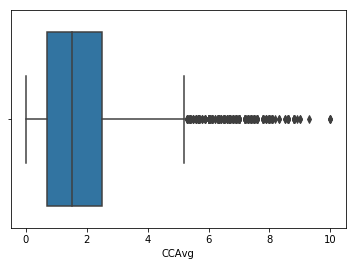

In [79]:
sns.boxplot(x=tb_df['CCAvg']) 
# outlier analysis - no outliers in Age, Experience, Family. 
#Income, CCAvg and mortgage have outliers, the treatment for which we will review nce we see the scatter with hue as "personal_Loan" 

In [80]:
corr = tb_df.corr()
corr.style.background_gradient(cmap='coolwarm') 

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1,0.994215,-0.0552686,-0.0304788,-0.0464177,-0.0520122,0.0413344,-0.0125386,-0.00772562,-0.000436242,0.00804255,0.0137024,0.00768104
Experience,0.994215,1,-0.0465742,-0.0304224,-0.0525631,-0.0500765,0.0131518,-0.0105816,-0.0074131,-0.00123213,0.0103533,0.0138979,0.00896745
Income,-0.0552686,-0.0465742,1,-0.0286048,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.0026165,0.169738,0.0142059,-0.00238501
ZIP_Code,-0.0304788,-0.0304224,-0.0286048,1,0.02548,-0.0126392,-0.0105441,0.00517132,-0.000933549,0.00474504,0.0212862,0.0283741,0.0227998
Family,-0.0464177,-0.0525631,-0.157501,0.02548,1,-0.109275,0.0649289,-0.0204449,0.061367,0.0199941,0.0141104,0.010354,0.0115881
CCAvg,-0.0520122,-0.0500765,0.645984,-0.0126392,-0.109275,1,-0.136124,0.109905,0.366889,0.0150863,0.136534,-0.00361101,-0.00668949
Education,0.0413344,0.0131518,-0.187524,-0.0105441,0.0649289,-0.136124,1,-0.0333271,0.136722,-0.010812,0.0139339,-0.0150038,-0.0110141
Mortgage,-0.0125386,-0.0105816,0.206806,0.00517132,-0.0204449,0.109905,-0.0333271,1,0.142095,-0.00541097,0.0893111,-0.0059949,-0.00723092
Personal_Loan,-0.00772562,-0.0074131,0.502462,-0.000933549,0.061367,0.366889,0.136722,0.142095,1,0.0219539,0.316355,0.00627782,0.00280151
Securities_Account,-0.000436242,-0.00123213,-0.0026165,0.00474504,0.0199941,0.0150863,-0.010812,-0.00541097,0.0219539,1,0.317034,0.0126275,-0.0150283


In [81]:
# it seems that age, experience[ which are almost one and the same],zip-code,onlie and creditcrad - seem to have no correlation with loan taking

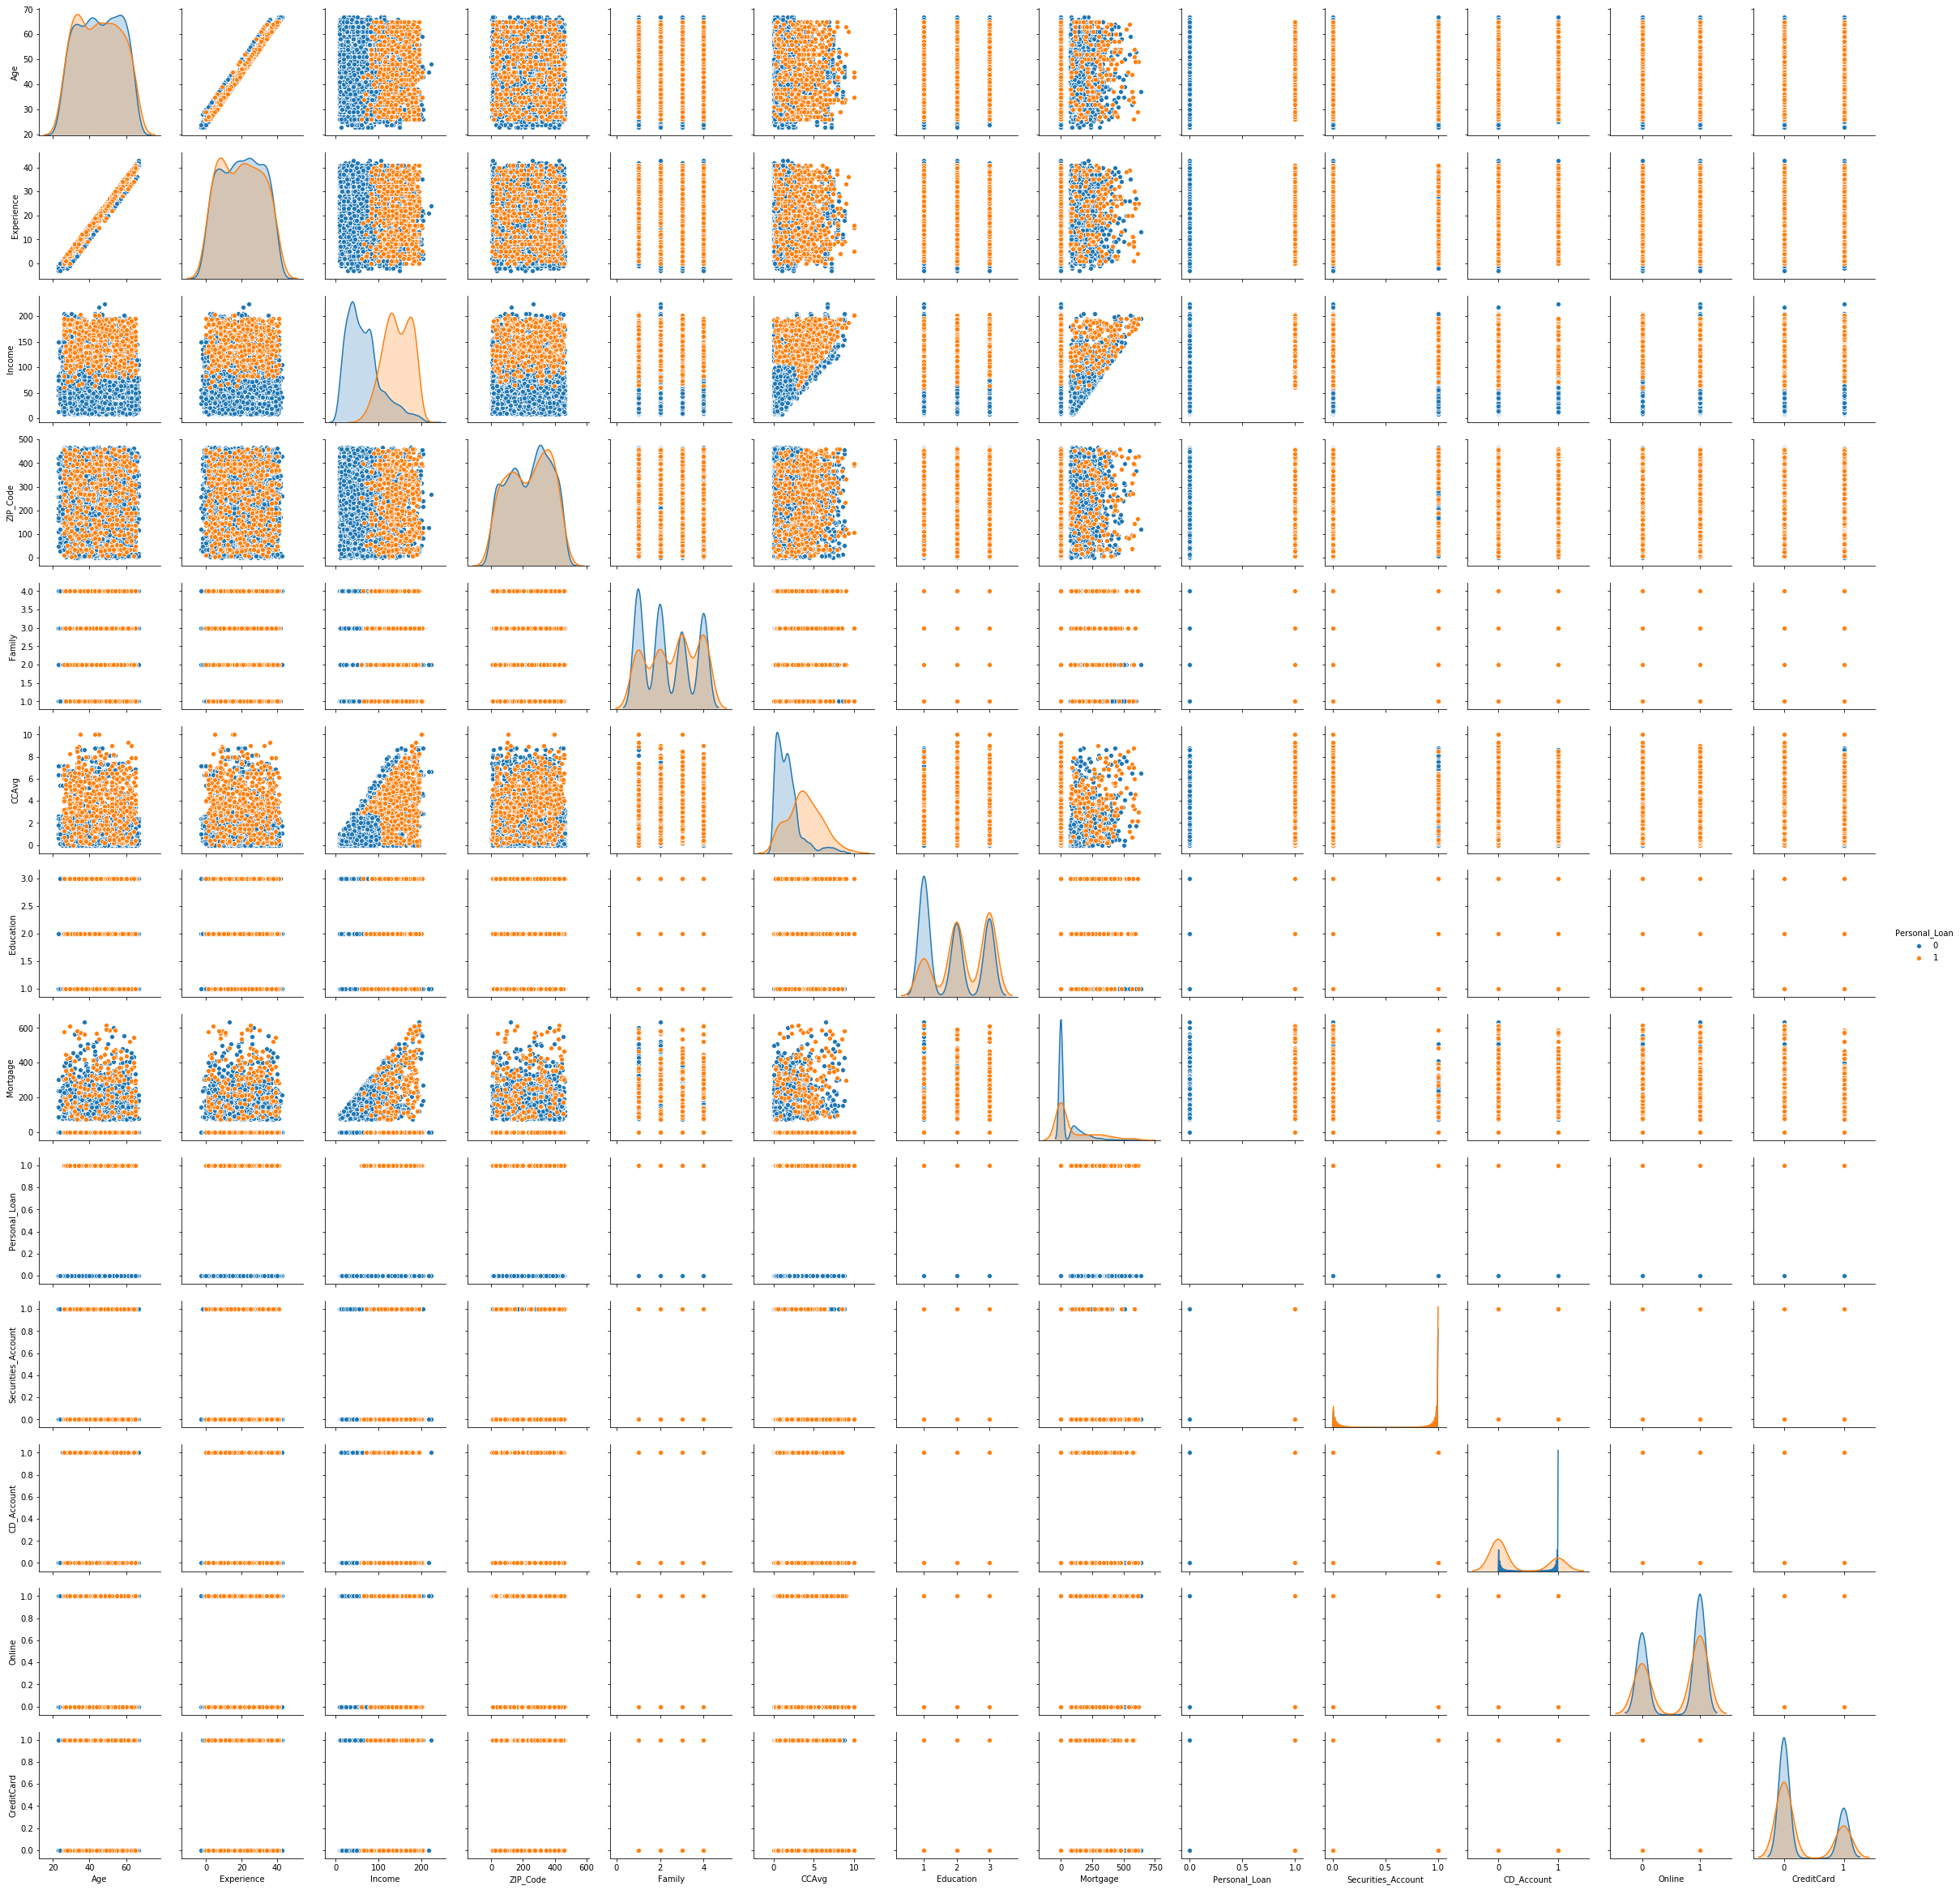

In [82]:
sns.pairplot(tb_df, hue = "Personal_Loan")

In [83]:
# expressing the relationships of the attrbutes  with the "Personal_Loan" to validate teh influence[which we can also see in the correclation graph to some extent.]
# age, zipcode ,experience, online and creditcard have little influence on people disposition to  Personal_Loan as per the sample
# income ad personal loan have a strong relation, higher the income , more the cstomers are taking loans.
# there is no strong influence between family size and loans takers - they are well distributed across family size. However we notice that almost all families with size = 3 , are taking laons
# there is some influence/ trend on ccavg a with  customers with personal laon. Loans peaks with the ccavg around mean ccavg values.
# strong influence with education, more educated  are taking more laons...
# weak loan correlation with mortatage
# everyone with a security account has a loan**
# more customers without CD account have loans

In [84]:
tb_df.corr()['Personal_Loan'][:]

Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP_Code             -0.000934
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

In [85]:
tb_df.drop('Experience', axis = 1, inplace = True)

In [86]:
tb_df.drop('Age', axis = 1, inplace = True)

In [87]:
tb_df.drop('ZIP_Code', axis = 1, inplace = True)

In [88]:
tb_df.drop('Online', axis = 1, inplace = True)

In [89]:
tb_df.drop('CreditCard', axis = 1, inplace = True)

In [90]:
tb_df.head()

,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account
0,49,4,1.6,1,0,0,1,0
1,34,3,1.5,1,0,0,1,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,0


In [91]:
Y = tb_df['Personal_Loan']
tb_df_o = tb_df.copy(deep = True) # storing for outlier treatment later with Y column

In [92]:
tb_df.drop('Personal_Loan', axis = 1, inplace = True)

In [93]:
from scipy.stats import zscore
tb_df_z = tb_df.apply(zscore)

In [94]:
tb_df_z.head()

,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account
0,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354
1,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354
2,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354
3,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354
4,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354


In [95]:
from sklearn.model_selection import train_test_split

X = tb_df_z.values
y = Y.values 

# taking 70:30 training and test set
# Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [97]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()

In [98]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

## Creating the K Nearest Neighbour Classifier Object

NNH3 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'euclidean')
NNH5 = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'euclidean')
NNH9 = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', metric = 'euclidean')

In [99]:
#Logistic, K-NN and Naïve Bayes fit model

In [100]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [101]:
from sklearn.metrics import confusion_matrix

#Predict

def get_model_data(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    return model.score(X_test, y_test), cm

In [102]:
#Function for confusion matrix nalysis
def cm_analysis(conf_mat):
    tp = conf_mat[0,0]
    tn = conf_mat[1,1]
    fp = conf_mat[1,0]
    fn = conf_mat[0,1]
    correct_pred = (tp + tn)/(tp + tn + fp + fn) # also called accuracy
    sensitivity = tp/(tp + fn) # also called True postive rate or recall
    precision = tp/(tp + fp)
    return correct_pred,sensitivity,precision 

In [103]:
score_lr, cm_lr = get_model_data(lr, X_train, X_test, y_train, y_test)

In [104]:
score_GNB, cm_GNB = get_model_data(clf_GNB,X_train, X_test, y_train, y_test)

In [105]:
score_NNH5, cm_NNH5=get_model_data(NNH5,X_train, X_test, y_train, y_test)

In [106]:
score_NNH3, cm_NNH3=get_model_data(NNH3,X_train, X_test, y_train, y_test)

In [107]:
score_NNH9, cm_NNH9=get_model_data(NNH9,X_train, X_test, y_train, y_test)

In [108]:
print("scores : ", score_lr, score_GNB, score_NNH5,score_NNH3,score_NNH9)

scores :  0.944 0.8753333333333333 0.9646666666666667 0.9626666666666667 0.9606666666666667


In [109]:
# We will proceed with NNH5 NB model only as it is the best

In [110]:

correct_pred, sensitivity, precision = cm_analysis(cm_lr)

print("% of correct prediction :" , correct_pred * 100)
print("sensitivity :", sensitivity)
print("precision :", precision)

% of correct prediction : 94.39999999999999
sensitivity : 0.9881569207994079
precision : 0.9515324305060584


In [111]:
correct_pred, sensitivity, precision = cm_analysis(cm_GNB)

print("% of correct prediction :" , correct_pred * 100)
print("sensitivity :", sensitivity)
print("precision :", precision)

% of correct prediction : 87.53333333333333
sensitivity : 0.9089563286454478
precision : 0.9504643962848297


In [112]:
correct_pred, sensitivity, precision = cm_analysis(cm_NNH5)

print("% of correct prediction :" , correct_pred * 100)
print("sensitivity :", sensitivity)
print("precision :", precision)

% of correct prediction : 96.46666666666667
sensitivity : 0.997779422649889
precision : 0.9642346208869814


Conclusion is that  K nearest neighours[5] is the best predictor of as it is most sensitive i.e does not give false negatives so we will not lose cases of loan holders and ofcourse the accuracy is best. Second best model is Logistic followed by Navie Bayes.

In [113]:
tb_df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [114]:
tb_df_o['Outlier'] = False # add a temp column to mark outliers for deletion. will be deleted later

In [115]:
# define a function which marks the outliers for any column as "True" in aq_df , 
# and returns the count of outliers rows for the column
def mark_outlier_row_from_Column(df,column_name):
    count = 0
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for i in range(0,len(tb_df_z)):
        if df[column_name][i] < lower_bound:            
            df['Outlier'][i] = True
            count = count +1
        if df[column_name][i] > upper_bound:            
            count = count +1
            df['Outlier'][i] = True
    return(column_name, count)

In [116]:
#will pick up the 4 columns with outliers one by one and identify the rows with outliers in "Outlier" column
# processing for "price"
print(mark_outlier_row_from_Column(tb_df_o,'CCAvg'))

('CCAvg', 324)


In [117]:
print(mark_outlier_row_from_Column(tb_df_o,'Mortgage'))

('Mortgage', 291)


In [118]:
print(mark_outlier_row_from_Column(tb_df_o,'Income'))

('Income', 96)


In [119]:
len(tb_df_o[tb_df_o['Outlier'] == True])
#len(outlier_df) #  outliers in all have to be removed

602

In [120]:
len(tb_df_o[tb_df_o['Personal_Loan'] == 1])

480

In [121]:
tb_df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Outlier               5000 non-null bool
dtypes: bool(1), float64(1), int64(7)
memory usage: 317.5 KB


In [122]:
len(tb_df_o[(tb_df_o['Personal_Loan'] == 1) & (tb_df_o['Outlier'] == True)])

207

In [125]:
# removing the outliers removes almost half of the personal_loan takers, thus we will not remove outliers as they have vital information.

In [124]:
# we conclude with proceding with KNN5 alogorithm.